# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [4]:
# 실행마다 동일한 결과를 얻기 위해 케라스와 텐서플로 설정을 조정합니다.
import tensorflow as tf

# 케라스의 랜덤 시드를 42로 설정합니다.
# 이 설정은 케라스의 모든 난수 생성기에서 동일한 결과를 보장합니다.
tf.keras.utils.set_random_seed(42)

# 텐서플로 연산을 결정적으로 만들기 위한 설정을 활성화합니다.
# 이 설정은 텐서플로 연산이 항상 동일한 결과를 생성하도록 보장합니다.
tf.config.experimental.enable_op_determinism()


## 손실 곡선

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Fashion MNIST 데이터셋을 로드합니다.
# train_input: 훈련 데이터 이미지
# train_target: 훈련 데이터 레이블
# test_input: 테스트 데이터 이미지
# test_target: 테스트 데이터 레이블
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 훈련 데이터를 정규화합니다.
# 픽셀 값을 0과 1 사이로 변환하여 모델 훈련 시 더 좋은 성능을 낼 수 있도록 합니다.
train_scaled = train_input / 255.0

# 훈련 데이터를 훈련 세트와 검증 세트로 나눕니다.
# train_scaled: 정규화된 훈련 데이터
# train_target: 훈련 데이터 레이블
# test_size=0.2: 전체 훈련 데이터의 20%를 검증 세트로 사용합니다.
# random_state=42: 무작위 분할을 재현 가능하게 하기 위해 랜덤 시드를 설정합니다.
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


In [8]:
def model_fn(a_layer=None):
    # Sequential 모델을 생성합니다. Sequential 모델은 레이어를 순차적으로 쌓아올리는 방식입니다.
    model = keras.Sequential()
    
    # 입력 이미지의 형태를 (28, 28)로 설정하고, 이미지를 1차원으로 평탄화(flatten)합니다.
    # Flatten 레이어는 2D 이미지를 1D 벡터로 변환합니다.
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # Dense 레이어를 추가합니다. 이 레이어는 100개의 뉴런과 ReLU 활성화 함수를 사용합니다.
    # ReLU(Rectified Linear Unit) 함수는 비선형성을 모델에 추가하여 복잡한 패턴을 학습할 수 있게 합니다.
    model.add(keras.layers.Dense(100, activation='relu'))
    
    # 선택적으로 전달된 a_layer 레이어를 모델에 추가합니다.
    # a_layer가 None이 아닌 경우에만 추가됩니다.
    if a_layer:
        model.add(a_layer)
    
    # 출력 레이어를 추가합니다. 이 레이어는 10개의 뉴런과 소프트맥스(softmax) 활성화 함수를 사용합니다.
    # 소프트맥스 함수는 다중 클래스 분류 문제에서 각 클래스에 대한 확률을 출력합니다.
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # 생성된 모델을 반환합니다.
    return model


In [10]:
# model_fn() 함수를 호출하여 모델을 생성합니다.
# 이 함수는 레이어를 순차적으로 쌓아서 모델을 반환합니다.
model = model_fn()

# 생성된 모델의 구조와 요약 정보를 출력합니다.
# 모델의 레이어, 출력 형태, 파라미터 수 등의 정보를 확인할 수 있습니다.
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [15]:
# 모델 훈련 후 반환된 history 객체에서 기록된 메트릭의 이름을 출력합니다.
# history 객체는 훈련 과정 중의 손실 값, 정확도 등 여러 메트릭을 기록합니다.
# 이 코드로 훈련 중 기록된 메트릭들의 이름을 확인할 수 있습니다.
print(history.history.keys())


dict_keys(['accuracy', 'loss'])


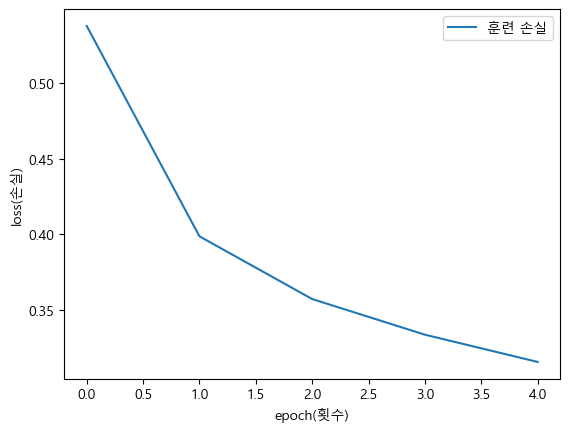

In [23]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt

# 훈련 과정에서 기록된 손실 값(loss)을 epoch에 대해 그래프로 시각화합니다.
plt.plot(history.history['loss'])  # 손실 값의 변화를 epoch에 대해 플로팅합니다.
plt.xlabel('epoch(횟수)')           # x축 레이블을 'epoch(횟수)'로 설정합니다.
plt.ylabel('loss(손실)')            # y축 레이블을 'loss(손실)'로 설정합니다.
plt.legend(['훈련 손실'])            # 그래프의 범례를 추가합니다. 훈련 손실을 나타냅니다.
plt.show()                         # 그래프를 화면에 표시합니다.

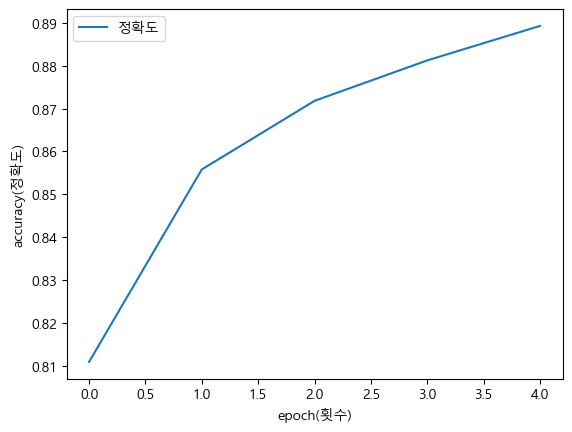

In [27]:
# 훈련 과정에서 기록된 정확도(accuracy) 값을 epoch에 대해 그래프로 시각화합니다.
plt.plot(history.history['accuracy'])  # 정확도 값의 변화를 epoch에 대해 플로팅합니다.
plt.xlabel('epoch(횟수)')               # x축 레이블을 'epoch(횟수)'로 설정합니다.
plt.ylabel('accuracy(정확도)')         # y축 레이블을 'accuracy(정확도)'로 수정합니다.
plt.legend(['정확도'])                  # 그래프의 범례를 추가합니다. 정확도를 나타냅니다.
plt.show()                             # 그래프를 화면에 표시합니다.

In [28]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


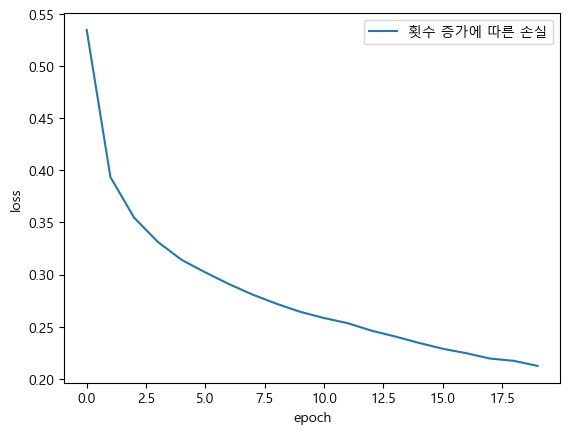

In [31]:
import matplotlib.pyplot as plt

# 훈련 과정에서 기록된 손실 값을 epoch에 대해 그래프로 시각화합니다.
plt.plot(history.history['loss'])  # 손실 값의 변화를 epoch에 대해 플로팅합니다.
plt.xlabel('epoch')                # x축 레이블을 'epoch'으로 설정합니다.
plt.ylabel('loss')                 # y축 레이블을 'loss'로 설정합니다.
plt.legend(['횟수 증가에 따른 손실'])  # 그래프의 범례를 추가합니다. 손실의 변화를 나타냅니다.
plt.show()                        # 그래프를 화면에 표시합니다.


## 검증 손실

In [34]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [35]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


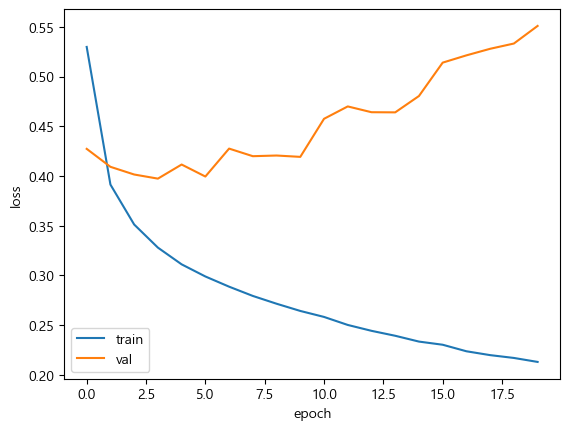

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

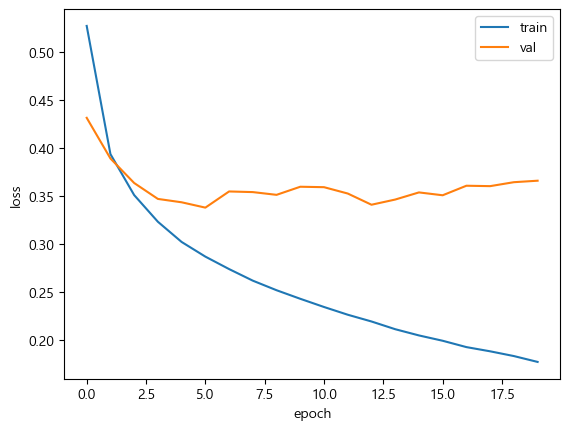

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [44]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

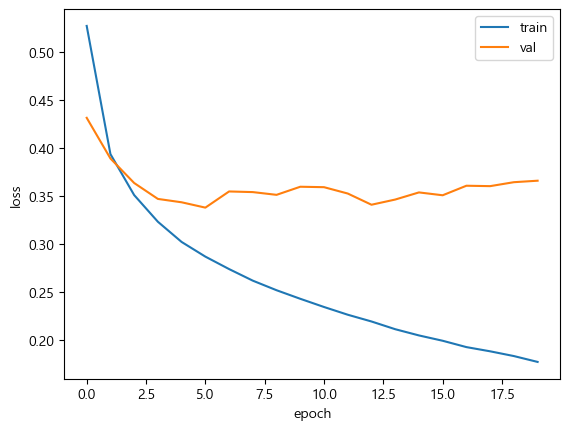

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [47]:
# Dropout 레이어를 사용하여 모델을 생성
model = model_fn(keras.layers.Dropout(0.3))  # Dropout 비율을 0.3으로 설정

# 모델 컴파일: Adam 옵티마이저와 손실 함수로 sparse_categorical_crossentropy를 사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))


In [48]:
model.save('model-whole.keras')

In [49]:
model.save_weights('model.weights.h5')

In [52]:
# !ls -al model*
# %ls -al model*

In [55]:
model = model_fn(keras.layers.Dropout(0.3))

# 가중치를 로드합니다.
model.load_weights('model.weights.h5')

In [56]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
0.8763333333333333


In [57]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target) # 평가 할때 

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8824 - loss: 0.3374


[0.3418816328048706, 0.8763333559036255]

## 콜백

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [59]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8872 - loss: 0.3168


[0.3211022615432739, 0.8865000009536743]

In [60]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [61]:
print(early_stopping_cb.stopped_epoch)

9


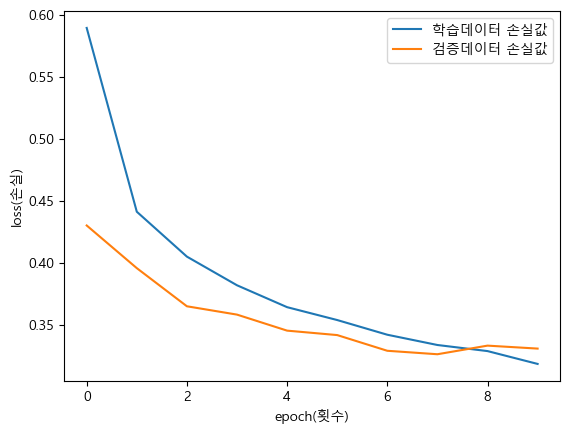

In [73]:
# 학습 과정에서의 손실(loss)과 검증 손실(val_loss)을 그래프로 시각화합니다.
plt.plot(history.history['loss'])       # 학습 데이터에 대한 손실 값을 그래프에 그립니다.
plt.plot(history.history['val_loss'])   # 검증 데이터에 대한 손실 값을 그래프에 그립니다.
plt.xlabel('epoch(횟수)')                    # x축 레이블을 'epoch'으로 설정합니다.
plt.ylabel('loss(손실)')                     # y축 레이블을 'loss'로 설정합니다.
plt.legend(['학습데이터 손실값', '검증데이터 손실값'])           # 범례를 추가하여 학습과 검증 손실을 구분합니다.
plt.show()                             # 그래프를 화면에 표시합니다.

In [65]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8831 - loss: 0.3227


[0.32648155093193054, 0.8820833563804626]